In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statistics 
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
od= pd.read_csv("C:/Users/Bhavika/Downloads/GreyAtom/Hackathon/Hackathon 1/Credit_card_consumption_prediction/Credit_card_consumption_prediction/Data/Train.csv")
df= pd.read_csv("C:/Users/Bhavika/Downloads/GreyAtom/Hackathon/Hackathon 1/Credit_card_consumption_prediction/Credit_card_consumption_prediction/Data/Train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 44 columns):
ID                       15000 non-null int64
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null int64
cc_cons_apr              15000 non-null float64
dc_cons_apr              15000 non-null float64
cc_cons_may              15000 non-null float64
dc_cons_may              15000 non-null float64
cc_cons_jun              15000 non-null float64
dc_cons_jun              15000 non-null float64
cc_count_apr             15000 non-null int64
cc_count_may             15000 non-null int64
cc_count_jun             15000 non-null int64
dc_count_apr             15000 non-null int64
dc_count_may             15000 non-null int64
dc_count_jun             15000 non-null int64
card_lim                 15000 non-null int64
personal_loan_active     15000 non-null int64
veh

In [25]:
df.describe()

,ID,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000
mean,10032.077067,47.790600,598.415467,17957.391719,8171.098287,1.633705e+04,7703.605203,12129.010832,7097.395321,41.488333,...,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576040e+04,55157.729867
std,5760.372343,30.632766,220.062345,25187.939958,14773.029481,2.706085e+04,18987.296785,18488.781136,13251.695907,97.432251,...,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179153e+05,97670.972252
min,1.000000,25.000000,123.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,...,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,5060.500000,33.000000,424.000000,4411.027500,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.750000,5.000000,...,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.548510e+03,6768.000000
50%,10054.000000,40.000000,623.000000,10288.100000,3996.900000,8.695030e+03,3820.500000,6655.250000,3327.000000,10.000000,...,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.954430e+03,13364.000000
75%,15015.250000,53.000000,799.000000,21405.000000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,...,11.000000,69.000000,5.598600e+04,8.461910e+04,8.559233e+04,21.000000,73.000000,5.321100e+04,9.376390e+03,20105.750000
max,19998.000000,223.000000,974.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,...,71.000000,171.000000,1.000000e+07,6.539810e+06,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06,408382.000000


In [5]:
df.shape

(15000, 44)

In [4]:
df.isnull().sum()

ID                       0
account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
c

In [5]:
df.drop(columns= ['ID','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq'], inplace=True)

In [6]:
df.columns

Index(['account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons'],
      dtype='object')

## EDA

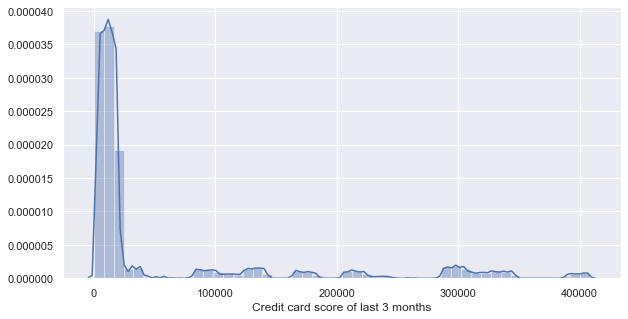

In [7]:
# What we can observe is data for CC_cons is not normally distributed
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df['cc_cons'],axlabel="Credit card score of last 3 months")

In [8]:
#Let's observe total number of Gender available in sample
df['gender'].value_counts()

M    12945
F     2055
Name: gender, dtype: int64

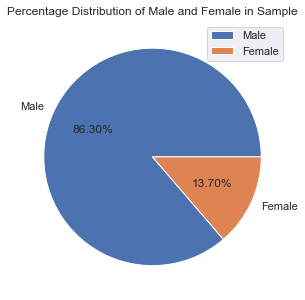

In [9]:
labels = ['Male','Female']
plt.pie(df['gender'].value_counts(), labels=labels,autopct='%1.2f%%')
plt.title("Percentage Distribution of Male and Female in Sample")
plt.legend(labels)
plt.show()

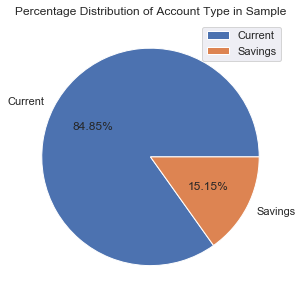

In [10]:
labels = ['Current','Savings']
plt.pie(df['account_type'].value_counts(), labels=labels,autopct='%1.2f%%')
plt.title("Percentage Distribution of Account Type in Sample")
plt.legend(labels)
plt.show()

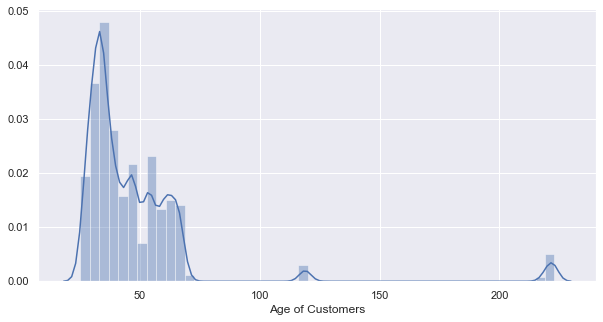

In [11]:
# We can observe that maximum people lies between 25 to 85 AGE Group.. 3% of them are ouliers
#df['age'].hist(by=df['gender'])
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df['age'],axlabel="Age of Customers")

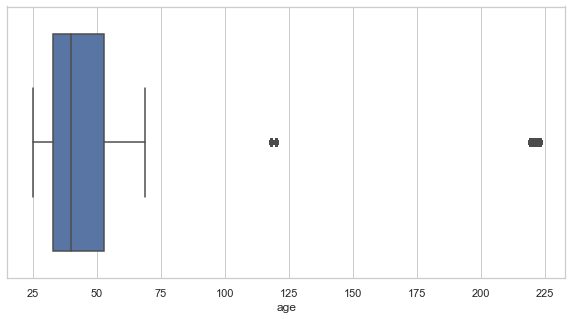

In [12]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["age"])

In [13]:
(df['age']>100).sum()/len(df)*100

3.56

In [14]:
indexNames = df[df['age'] >100 ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [15]:
df.shape

(14466, 38)

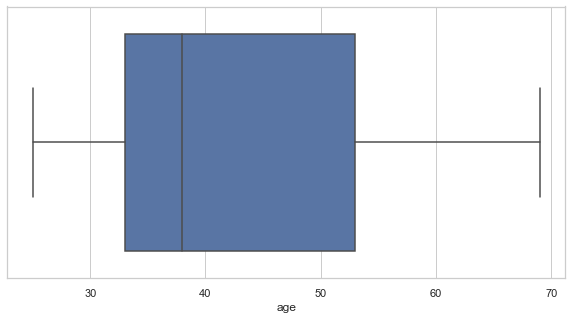

In [16]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["age"])

In [17]:
print("Person with the minimum Age is:", df['age'].min())
print("Person with the maximum Age is:", df['age'].max())

statistics.median(df['age'])
lower_quar = np.percentile(df['age'], 25)
middle_quar = np.percentile(df['age'], 50)
upper_quar = np.percentile(df['age'], 75)
IQR= upper_quar-lower_quar
print("25% of Data lies in :",lower_quar)
print("50% of Data lies in :",middle_quar)
print("75% of Data lies in :",upper_quar)
print("Interquartile range is :",IQR)

Person with the minimum Age is: 25
Person with the maximum Age is: 69
25% of Data lies in : 33.0
50% of Data lies in : 38.0
75% of Data lies in : 53.0
Interquartile range is : 20.0


In [18]:
def age_buckets(x): 
    if x >=25 and x<=35:
        return '25-35' 
    elif x >=36 and x<=50: 
        return '36-50' 
    elif x > 50: 
        return '50+' 
df['AgeRange'] = df.age.apply(age_buckets)

In [19]:
print(df['AgeRange'].value_counts())

25-35    5971
36-50    4404
50+      4091
Name: AgeRange, dtype: int64


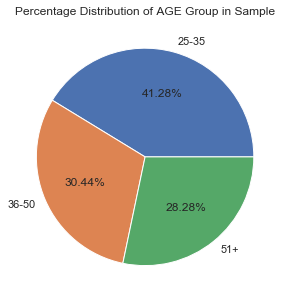

In [20]:
labels = ['25-35','36-50','51+']
plt.pie(df['AgeRange'].value_counts(), labels=labels,autopct='%1.2f%%')
plt.title("Percentage Distribution of AGE Group in Sample")
#plt.legend(labels)
plt.show()

In [21]:
#NEED TO IMPROVE THIS
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

#f, ax = plt.subplots(figsize=(10, 8))
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [22]:
#Total Amount spent by credit and debit card  for each month
df['DC_Spend_April']= df['cc_cons_apr']+df['dc_cons_apr']
df['DC_Spend_May']= df['cc_cons_may']+df['dc_cons_may']
df['DC_Spend_June']= df['cc_cons_jun']+df['dc_cons_jun']
df['DC_Spend_Total']= df['cc_cons_apr']+df['dc_cons_apr']+df['cc_cons_may']+df['dc_cons_may']+df['cc_cons_jun']+df['dc_cons_jun']

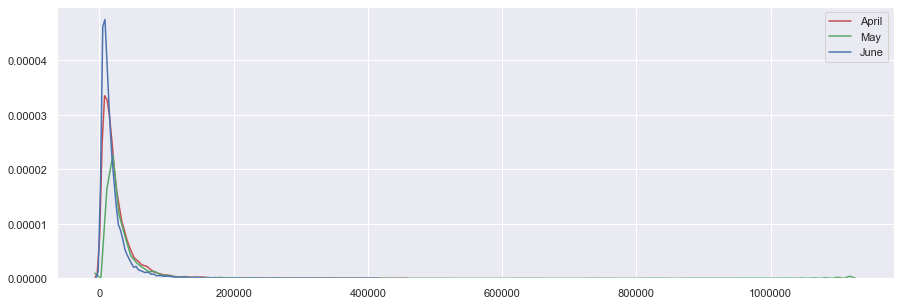

In [24]:
#KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable.
#It depicts the probability density at different values in a continuous variable
sns.set(rc={'figure.figsize':(15,5)})
sns.kdeplot(df.DC_Spend_April, label='April', color="r")
sns.kdeplot(df.DC_Spend_May, label='May', color="g")
sns.kdeplot(df.DC_Spend_June, label='June', color="b")

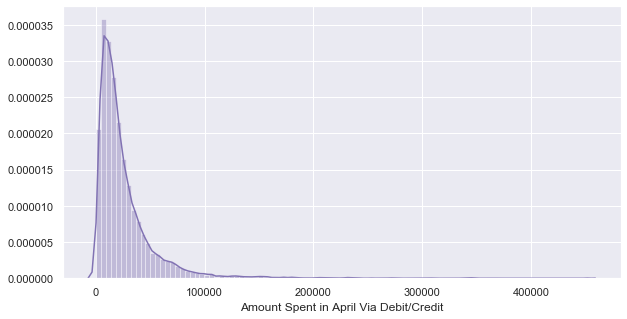

In [25]:
#Below plot shows us amount spent in APril with exact counts
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df.DC_Spend_April,color="m",axlabel="Amount Spent in April Via Debit/Credit", bins=100)

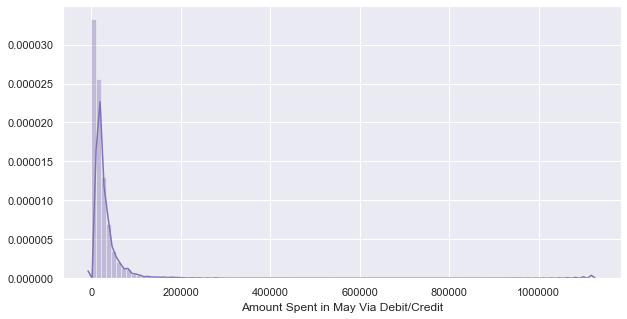

In [26]:
#Below plot shows us amount spent in May with exact counts
sns.distplot(df.DC_Spend_May,color="m",axlabel="Amount Spent in May Via Debit/Credit",bins=100)

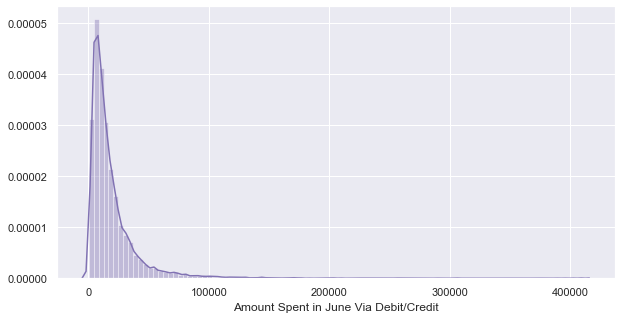

In [27]:
#Below plot shows us amount spent in June with exact counts
sns.distplot(df.DC_Spend_June,color="m",axlabel="Amount Spent in June Via Debit/Credit",bins=100)

In [28]:
df['DC_Spend_April_per']=np.round((df['DC_Spend_April']/df['DC_Spend_Total']*100),2)
df['DC_Spend_May_per']=np.round((df['DC_Spend_May']/df['DC_Spend_Total']*100),2)
df['DC_Spend_June_per']=np.round((df['DC_Spend_June']/df['DC_Spend_Total']*100),2)


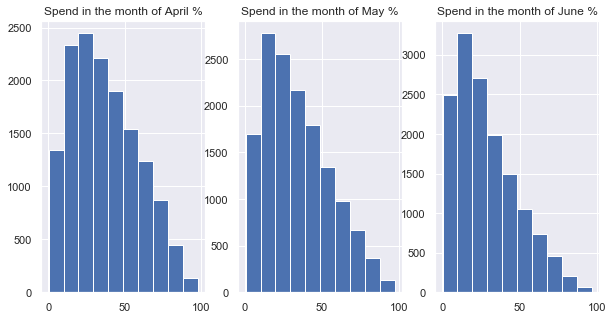

In [29]:
fig = plt.figure(figsize=(10,5))
plt1=fig.add_subplot(131)
plt2=fig.add_subplot(132)
plt3=fig.add_subplot(133)
plt1.hist(df['DC_Spend_April_per'])
plt1.title.set_text('Spend in the month of April %')
plt2.hist(df['DC_Spend_May_per'])
plt2.title.set_text('Spend in the month of May %')
plt3.hist(df['DC_Spend_June_per'])
plt3.title.set_text('Spend in the month of June %')

In [30]:
print("Total number of Amount spend in April via Credit + Debit card is :",df['DC_Spend_April'].sum())
print("Total % of Amount spend in April via Credit + Debit card is :",
    np.round((df['DC_Spend_April'].sum()/(df['DC_Spend_Total'].sum())*100),2))


Total number of Amount spend in April via Credit + Debit card is : 376726847.03999996
Total % of Amount spend in April via Credit + Debit card is : 37.55


In [31]:
print("Total number of Amount spend in May via Credit + Debit card is :",df['DC_Spend_May'].sum())
print("Total % of Amount spend in May via Credit + Debit card is :",
    np.round((df['DC_Spend_May'].sum()/(df['DC_Spend_Total'].sum())*100),2))

Total number of Amount spend in May via Credit + Debit card is : 348109827.165
Total % of Amount spend in May via Credit + Debit card is : 34.7


In [32]:
print("Total number of Amount spend in June via Credit + Debit card is :",df['DC_Spend_June'].sum())
print("Total % of Amount spend in June via Credit + Debit card is :",
    np.round((df['DC_Spend_June'].sum()/(df['DC_Spend_Total'].sum())*100),2))

Total number of Amount spend in June via Credit + Debit card is : 278454470.35
Total % of Amount spend in June via Credit + Debit card is : 27.75


In [33]:
#Total investmet done in JUNE
#investment 4 was in minus so we took ABS value of it 
df['total_investment']= df['investment_1']+df['investment_2']+df['investment_3']+abs(df['investment_4'])
#print(df['total_investment'].head(5))

C:\Users\Bhavika\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


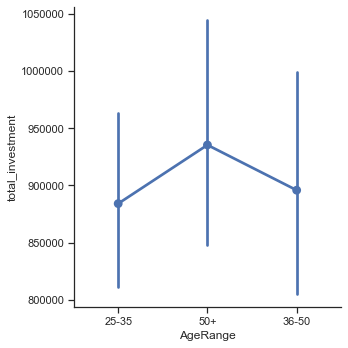

In [34]:
sns.set(style="ticks")
sns.factorplot(x='AgeRange', y='total_investment', data=df)

In [35]:
# we calcullated here what amount customer is lagging every month
#difference of amount credited in May - April
df['apr_may_cr_diff']= df['credit_amount_may']-df['credit_amount_apr']
#difference of amount credited in June - May
df['may_jun_cr_diff']= df['credit_amount_jun']-df['credit_amount_may']
#print(df['apr_may_cr_diff'].head(2))
#print(df['may_jun_cr_diff'].head(2))

In [36]:
# the above calculation we did on max credited amount
df['max_apr_may_cr_diff']= df['max_credit_amount_may']-df['max_credit_amount_apr']
df['max_may_jun_cr_diff']= df['max_credit_amount_jun']-df['max_credit_amount_may']
#print(df['max_apr_may_cr_diff'].head(2))
#print(df['max_may_jun_cr_diff'].head(2))

In [37]:
# now we need to focus on those people whose credited amount is continuously going low
dummy1 = df[(df['apr_may_cr_diff']<0) & (df['may_jun_cr_diff']<0)] 
print(dummy1['gender'].value_counts())
print(dummy1['account_type'].value_counts())
print(dummy1['AgeRange'].value_counts())
print(dummy1.groupby('gender')['AgeRange'].value_counts())
print(dummy1.groupby(['gender','account_type'])['AgeRange'].value_counts())
print(np.round((dummy1['gender'].count()/len(df)*100),2))
print(np.round((dummy1['account_type'].count()/len(df)*100),2))

#*******************************************************8
print("Toal Number of customer whose amount is getting consistently low  in subsequesnt month:",len(dummy1))
print("Male count among the are:",2024)
print("Female count among the are:",324)
print("Current Account Holders among them are:",1981)
print("Current Saving Holders among them are:",367)
print("Most of them belongs to Age group of 36-50")
print("Percentage of Current Account holder is among all decreasing credit amount holder:",np.round((2071/2447*100),2))
print("Percentage of Current Account holder is among entire sample:",np.round((2071/15000*100),2))
print("Percentage of all decreasing credit amount holder based on total sample:",np.round((2447/15000*100),2))

M    2024
F     324
Name: gender, dtype: int64
current    1981
saving      367
Name: account_type, dtype: int64
25-35    984
50+      702
36-50    662
Name: AgeRange, dtype: int64
gender  AgeRange
F       25-35       142
        36-50        91
        50+          91
M       25-35       842
        50+         611
        36-50       571
Name: AgeRange, dtype: int64
gender  account_type  AgeRange
F       current       25-35       117
                      50+          81
                      36-50        74
        saving        25-35        25
                      36-50        17
                      50+          10
M       current       25-35       711
                      50+         517
                      36-50       481
        saving        25-35       131
                      50+          94
                      36-50        90
Name: AgeRange, dtype: int64
16.23
16.23
Toal Number of customer whose amount is getting consistently low  in subsequesnt month: 2348
Male coun

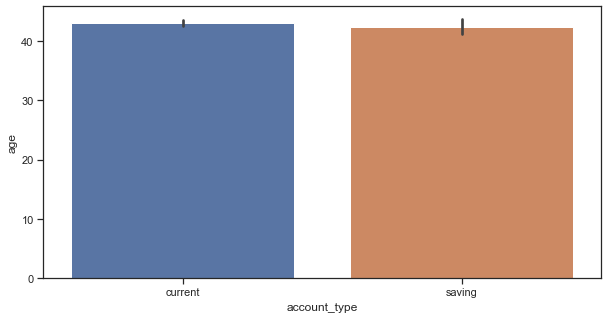

In [38]:
sns.barplot(x='account_type',y='age',data=dummy1)

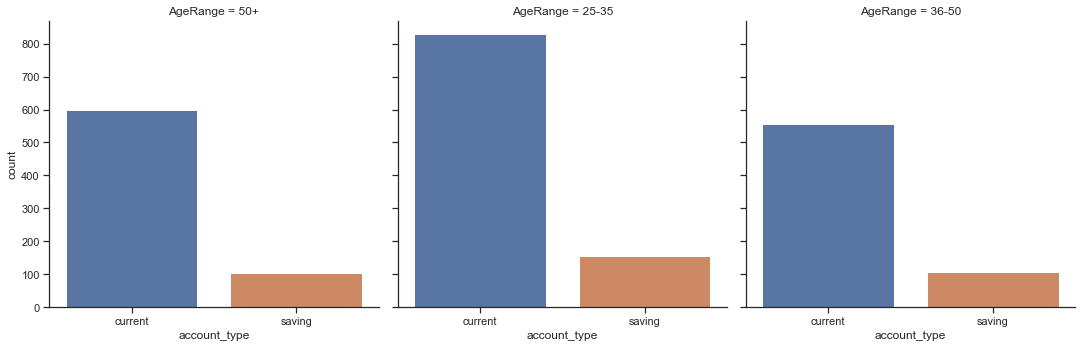

In [39]:
#graphical view of customer based on demographic whose account credited balance is consistent decreasing
sns.catplot(x='account_type', col='AgeRange', kind='count', data=dummy1, orient= 'v');

In [40]:
# Frequency Count of each region code
frequencytable = {}
def to_frequency_table(data):
    for key in data:
        if key in frequencytable:
            frequencytable[key] += 1
        else:
            frequencytable[key] = 1
    return frequencytable

lst =to_frequency_table(dummy1['region_code'])
newDict1 = dict()
print("Below are the regions where continuous minius credit balance has observed:")
print("*"*100)
#print(lst)

print('region_code  Frequency')
for region_code, Frequency in lst.items():
    print('{} {}'.format(region_code, Frequency))

Below are the regions where continuous minius credit balance has observed:
****************************************************************************************************
region_code  Frequency
631 14
805 36
860 13
685 21
503 30
508 12
945 19
249 63
385 30
683 37
516 30
966 23
698 15
485 33
762 10
355 44
867 55
424 16
243 11
748 37
538 23
802 13
623 29
445 20
537 32
464 21
628 15
446 6
750 13
523 24
968 9
614 25
883 28
799 45
536 40
866 26
269 38
771 13
505 19
865 4
956 6
245 11
594 9
247 18
653 27
686 14
864 9
723 28
958 18
233 26
760 4
486 23
700 30
517 1
330 20
638 8
511 12
394 20
305 3
488 32
836 9
454 17
658 22
583 5
374 6
324 11
525 8
268 11
574 10
448 16
708 19
248 4
647 25
535 25
254 14
882 11
737 24
863 19
274 6
911 18
351 6
370 12
588 14
818 18
366 6
258 9
428 1
270 11
566 7
626 21
314 16
300 3
593 7
684 15
766 6
743 45
558 6
619 2
534 5
465 5
957 7
643 9
299 24
575 5
887 12
855 20
296 10
386 9
927 8
746 2
315 2
259 7
921 8
640 10
244 8
606 8
656 9
809 16
713 10
974 8
40

Text(0.5, 1.0, 'EMI Distribution Age Wise')

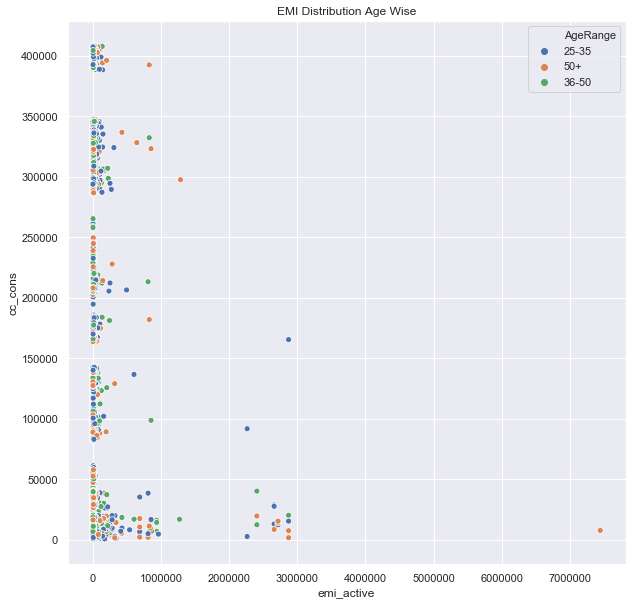

In [41]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.scatterplot(x="emi_active", y="cc_cons", hue="AgeRange",
                     data=df,x_bins=15)
ax.set_title("EMI Distribution Age Wise")

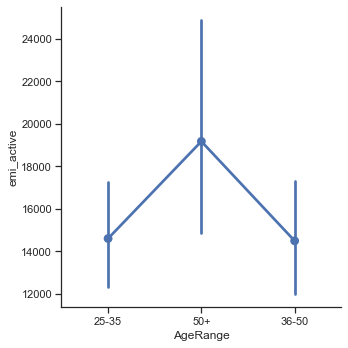

In [42]:
sns.set(style="ticks")
sns.factorplot(x='AgeRange', y='emi_active', data=df)

In [43]:
#sns.boxplot(x=np.log(df["emi_active"]))
statistics.median(df['emi_active'])
lower_quar = np.percentile(df['emi_active'], 25)
middle_quar = np.percentile(df['emi_active'], 50)
upper_quar = np.percentile(df['emi_active'], 75)
IQR= (np.round(upper_quar-lower_quar),)
print("25% of Data lies in :",lower_quar)
print("50% of Data lies in :",middle_quar)
print("75% of Data lies in :",upper_quar)
print("Interquartile range is :",IQR)

25% of Data lies in : 1545.94
50% of Data lies in : 3947.4
75% of Data lies in : 9362.14
Interquartile range is : (7816.0,)


In [44]:
print("The Area which has hightest consumption average rate of credit card is:",df.groupby('region_code')['cc_cons'].sum().argmax())
df_max = df[df['region_code']== 249]
print("The Area which has hightest consumption average rate of credit card has total score of :",df_max['cc_cons'].sum())
print("The Area which has hightest consumption average rate of credit card stands alone with  % of in comparison to other regions :",
      np.round((df_max['cc_cons'].sum()/df['cc_cons'].sum()*100),2))

print("*"*100)
print("The Area which has lowest consumption average rate of credit card is:",df.groupby('region_code')['cc_cons'].sum().argmin())
df_min = df[df['region_code']== 436]
print("The Area which has lowest consumption average rate of credit card has total score of :",df_min['cc_cons'].sum())
print("The Area which has lowest consumption average rate of credit card stands alone with  % of in comparison to other regions :",
       np.round((df_min['cc_cons'].sum()/df['cc_cons'].sum()*100),5))

print("*"*100)


The Area which has hightest consumption average rate of credit card is: 249
The Area which has hightest consumption average rate of credit card has total score of : 20716937
The Area which has hightest consumption average rate of credit card stands alone with  % of in comparison to other regions : 2.6
****************************************************************************************************
The Area which has lowest consumption average rate of credit card is: 436
The Area which has lowest consumption average rate of credit card has total score of : 2939
The Area which has lowest consumption average rate of credit card stands alone with  % of in comparison to other regions : 0.00037
****************************************************************************************************


In [45]:
#let's define a threshold value
df_thr1 = df.groupby('region_code')['cc_cons'].sum().reset_index()
df_thr2=df_thr1[df_thr1.cc_cons<20000]
#print(df_thr2)
lst = [436,484,608,618,857,874]
print("The regions where bank needs to plan a strategy are :",lst)
print(df_thr2)

The regions where bank needs to plan a strategy are : [436, 484, 608, 618, 857, 874]
     region_code  cc_cons
55           436     2939
67           484     3841
104          608    11630
108          618    17531
173          874    16257


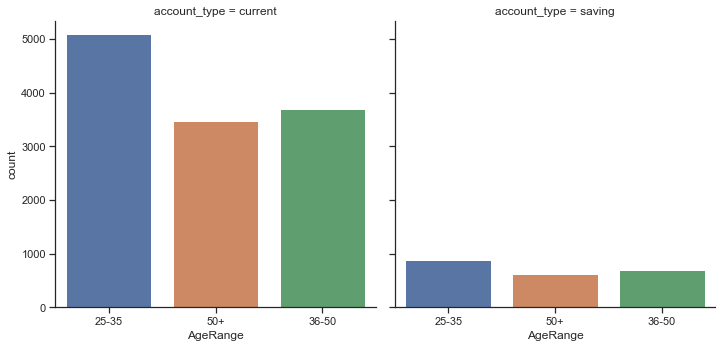

In [46]:
sns.catplot(x='AgeRange', col='account_type', kind='count', data=df);

In [47]:
df['investment1_per']=df['investment_1']/df['total_investment']*100
df['investment2_per']=df['investment_2']/df['total_investment']*100
df['investment3_per']=df['investment_3']/df['total_investment']*100
df['investment4_per']=abs(df['investment_4'])/df['total_investment']*100

print(df['investment1_per'].head(2))
print(df['investment2_per'].head(2))
print(df['investment3_per'].head(2))
print(df['investment4_per'].head(2))

0     6.238078
1    44.652874
Name: investment1_per, dtype: float64
0    13.083348
1    36.105529
Name: investment2_per, dtype: float64
0     8.276074
1    18.927961
Name: investment3_per, dtype: float64
0    72.402501
1     0.313636
Name: investment4_per, dtype: float64


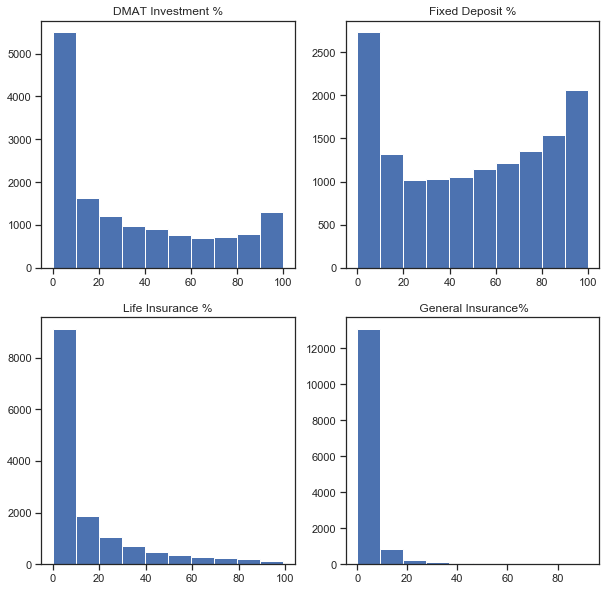

In [48]:
fig = plt.figure(figsize=(10,10))
plt1=fig.add_subplot(221)
plt2=fig.add_subplot(222)
plt3=fig.add_subplot(223)
plt4=fig.add_subplot(224)

#plt1.set_ylim([0,50000])
plt1.hist(df['investment1_per'])
plt1.title.set_text('DMAT Investment %')



plt2.hist(df['investment2_per'])
plt2.title.set_text('Fixed Deposit %')


plt3.hist(df['investment3_per'])
plt3.title.set_text('Life Insurance %')


plt4.hist(df['investment4_per'])
plt4.title.set_text(' General Insurance%')

#what we can observe that people most people do 0-10 % invetsment in DMAT [Low risk investors]
#what we can observe that people most people prefer FD as secure investments
#what we can observe that people 8000+ people invest in life insurance
#what we can observe that most of the people do not have general insurance



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

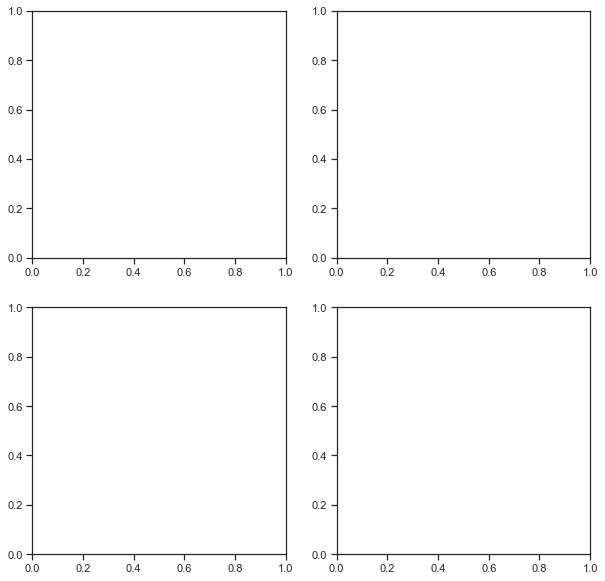

In [51]:
fig = plt.figure(figsize=(10,10))
plt1=fig.add_subplot(221)
plt2=fig.add_subplot(222)
plt3=fig.add_subplot(223)
plt4=fig.add_subplot(224)

#plt1.set_ylim([0,50000])
plt1.scatter(x=df['investment1_per'],y=df['cc_cons'],data = df)
plt1.title.set_text('DMAT Investment %')



plt2.scatter(x=df['investment1_per'],y=df['cc_cons'],data = df)
plt2.title.set_text('Fixed Deposit %')


plt3.scatter(x=df['investment1_per'],y=df['cc_cons'],data = df)
plt3.title.set_text('Life Insurance %')


plt4.scatter(x=df['investment1_per'],y=df['cc_cons'],data = df)
plt4.title.set_text(' General Insurance%')
# We can observe that most of the people who have DMAT account uses 

In [ ]:
#############################Pending HERE Onward

In [52]:
#Pending to ADD
#Month end balance
df['balance_april']= df['credit_amount_apr']-df['debit_amount_apr']
df['balance_may']= df['credit_amount_may']-df['debit_amount_may']
df['balance_june']= df['credit_amount_jun']-df['debit_amount_jun']
df['balance_total']= df['balance_april']+df['balance_may']+df['balance_june']

In [53]:
#pd.scatter_matrix(df['balance_total'], alpha = 0.3, figsize = (14,8), diagonal = 'kde');
#sns.pairplot(df)

In [54]:
df['balance_post_invst']=df['balance_total']-df['total_investment']


In [55]:
print(df['DC_Spend_Total'].head(2))
print(df['balance_total'].head(2))
print(df['total_investment'].head(2))
print(df['balance_post_invst'].head(2))

0    92946.40
1    45968.62
Name: DC_Spend_Total, dtype: float64
0    102231.83
1     89410.00
Name: balance_total, dtype: float64
0      9509.34
1    478260.71
Name: total_investment, dtype: float64
0     92722.49
1   -388850.71
Name: balance_post_invst, dtype: float64


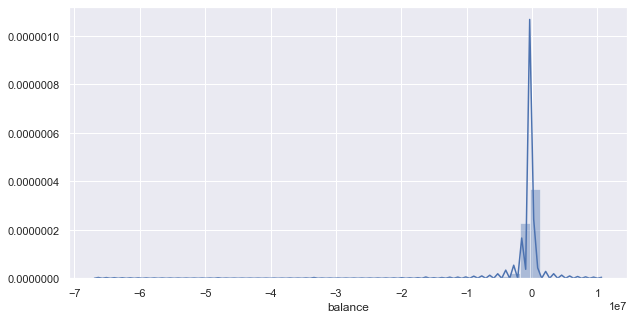

In [56]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df['balance_post_invst'],axlabel="balance")

In [57]:
df['Dr_cr_amt_in_apr']= df['credit_amount_apr']-df['debit_amount_apr']
df['Dr_cr_amt_in_May']= df['credit_amount_may']-df['debit_amount_may']
df['Dr_cr_amt_in_June']=df['credit_amount_jun']-df['debit_amount_jun']


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C857E90C8>,
      dtype=object)

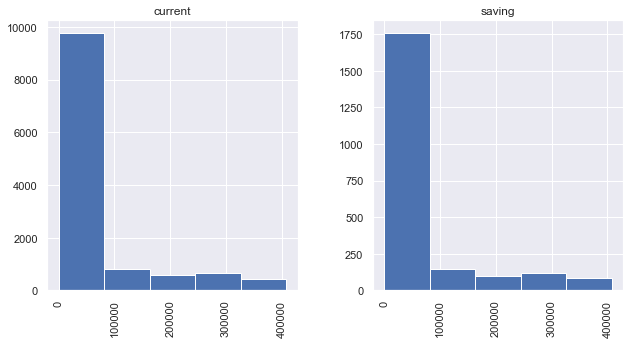

In [58]:
df['cc_cons'].hist(by=df['account_type'], bins = 5)

In [59]:
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)